In [21]:
# getting packages and data

import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
sns.set_theme()

df= pd.read_csv("okcupid_profiles.csv")

This is for word frequency

How many most common words to print: 20

OK. The 20 most common words are as follows

love :  118218
good :  87924
friends :  79471
music :  79166
people :  75980
life :  69116
time :  67688
things :  63740
food :  59707
movies :  45528
want :  44319
work :  43478
think :  39054
books :  38248
enjoy :  37355
family :  36865
anything :  36803
fun :  32836
working :  29744
looking :  29345


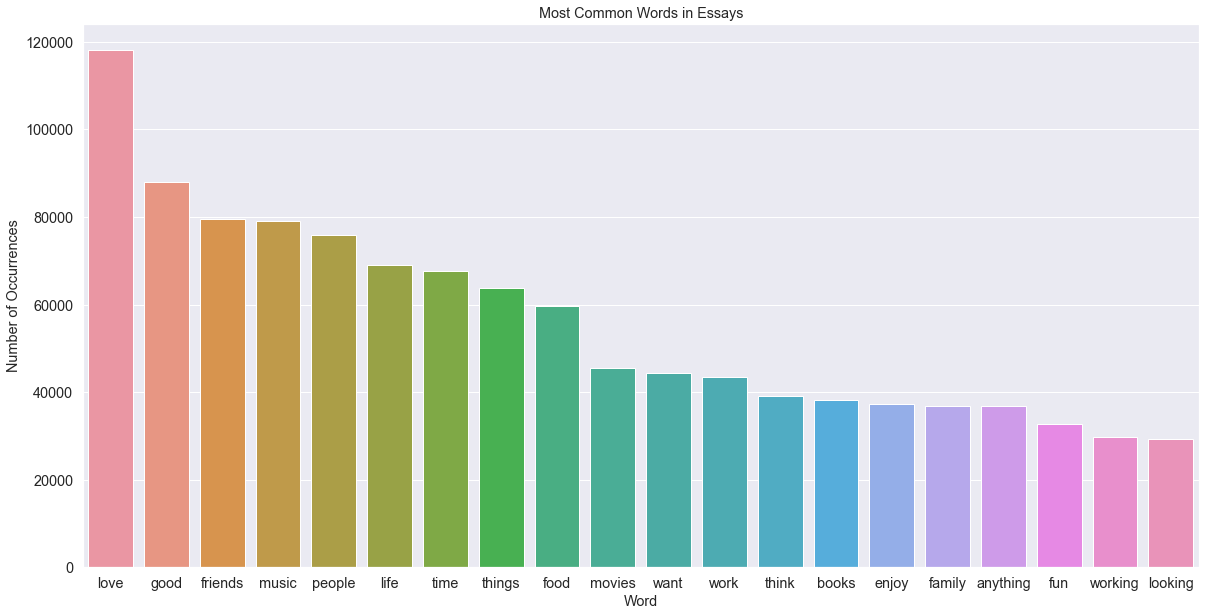

In [27]:
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)
%matplotlib inline

# Read input file, note the encoding is specified here 
# It may be different in your text file
file = open("essay_words.txt")
a= file.read()

# Stopwords
stopwords = set(line.strip() for line in open('stopwords.txt'))

# Instantiate a dictionary, and for every word in the file, 
# Add to the dictionary if it doesn't exist. If it does, increase the count.
wordcount = {}

# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in a.lower().split():
    word = word.replace(".","")
    word = word.replace(",","")
    word = word.replace(":","")
    word = word.replace("\"","")
    word = word.replace("!","")
    word = word.replace("â€œ","")
    word = word.replace("â€˜","")
    word = word.replace("*","")
    if word not in stopwords:
        if word not in wordcount:
            wordcount[word] = 1
        else:
            wordcount[word] += 1
            
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    print(word, ": ", count)
    
# Close the file
file.close()

# Create a data frame of the most common words 
# Draw a bar chart
lst = word_counter.most_common(n_print)
temp_df = pd.DataFrame(lst, columns = ['Word', 'Count'])
plt.figure(figsize=(20, 10))
sns.barplot(x = temp_df.Word, y = temp_df.Count)
plt.title("Most Common Words in Essays")
plt.xlabel("Word")
plt.ylabel("Number of Occurrences")
plt.show()